In [66]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [67]:
def encode_msg(qc, qubit, msg):
    def encode_00():
        pass
    def encode_01():
        qc.z(qubit)
    def encode_10():
        qc.x(qubit)
    def encode_11():
        qc.z(qubit)
        qc.x(qubit)
    encoding_funs = {'00': encode_00,
                     '01': encode_01,
                     '10': encode_10,
                     '11': encode_11}
    encoding_funs.get(msg, encode_00)()

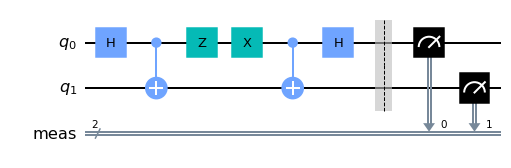

In [68]:
simulator = Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

encode_msg(qc, 0, '11')

qc.cx(0, 1)
qc.h(0)

qc.measure_all()

qc.draw(output='mpl')

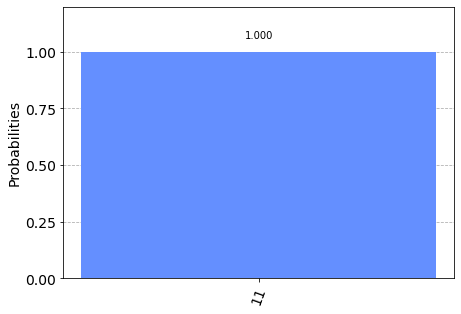

In [71]:
job_sim = execute(qc, simulator)
sim_result = job_sim.result()
plot_histogram(sim_result.get_counts(qc))